In [1]:
# import necessary resources
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2

Image shape:  (480, 960, 4)


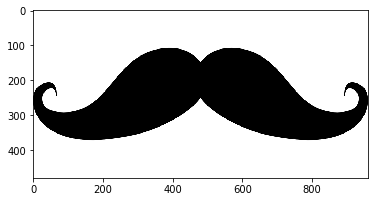

In [2]:
# load in sunglasses image with cv2 and IMREAD_UNCHANGED
moustache = cv2.imread('images/moustache.png', cv2.IMREAD_UNCHANGED)

# plot our image
plt.imshow(moustache)

# print out its dimensions
print('Image shape: ', moustache.shape)

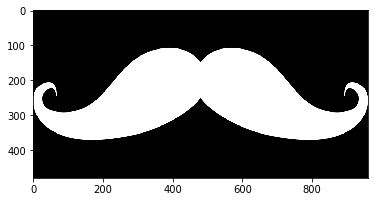

In [3]:
alpha_channel=moustache[:,:,3]
plt.imshow(alpha_channel,cmap='gray')

In [5]:
key_points_frame=pd.read_csv('data/training_frames_keypoints.csv')
print('No of images : ',len(key_points_frame))

No of images :  3462


In [7]:
def show_keypoints(image,key_points):
    plt.imshow(image)
    plt.scatter(key_points[:,0],key_points[:,1],s=20,c='r')

In [16]:
key_pts

array([48.0, 93.0, 52.0, 106.0, 55.0, 118.0, 58.0, 130.0, 64.0, 143.0,
       76.0, 149.0, 88.0, 155.0, 104.0, 159.0, 119.0, 159.0, 134.0, 156.0,
       143.0, 150.0, 150.0, 144.0, 153.0, 132.0, 156.0, 120.0, 156.0,
       107.0, 156.0, 98.0, 153.0, 86.0, 67.0, 75.0, 76.0, 69.0, 82.0,
       66.0, 91.0, 70.0, 97.0, 70.0, 125.0, 70.0, 128.0, 67.0, 137.0,
       67.0, 143.0, 67.0, 146.0, 70.0, 113.0, 82.0, 116.0, 91.0, 119.0,
       101.0, 119.0, 107.0, 107.0, 113.0, 113.0, 113.0, 116.0, 113.0,
       122.0, 113.0, 125.0, 110.0, 79.0, 85.0, 85.0, 82.0, 91.0, 82.0,
       97.0, 85.0, 91.0, 85.0, 85.0, 88.0, 125.0, 85.0, 128.0, 82.0,
       137.0, 79.0, 140.0, 83.0, 134.0, 86.0, 128.0, 85.0, 91.0, 128.0,
       101.0, 122.0, 113.0, 119.0, 119.0, 119.0, 122.0, 119.0, 131.0,
       119.0, 137.0, 125.0, 131.0, 131.0, 125.0, 134.0, 119.0, 134.0,
       113.0, 134.0, 104.0, 134.0, 94.0, 128.0, 110.0, 125.0, 116.0,
       122.0, 125.0, 122.0, 134.0, 125.0, 125.0, 128.0, 119.0, 128.0,
       110.

In [17]:
key_pts.shape

(136,)

C:\Users\Sarthak\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


Image name  Wayne_Gretzky_41.jpg


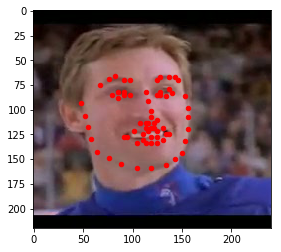

In [18]:
n=12
image_name=key_points_frame.iloc[n,0]
image=plt.imread(os.path.join('data/training',image_name))
key_pts=key_points_frame.iloc[n,1:].as_matrix()
key_pts=key_pts.astype('float').reshape(-1,2)

print('Image name ',image_name)
show_keypoints(image,key_pts)


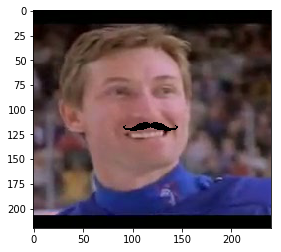

In [51]:
image_copy=image.copy()
#top left position
x=int(key_pts[20,0])
y=int(key_pts[35,1])
w=int(abs(key_pts[20,0]-key_pts[26,0]))
h=int(abs(key_pts[52,1]-key_pts[58,1]))
new_moustache=cv2.resize(moustache,(w,h))#,interpolation = cv2.INTER_CUBIC)
roi_color=image_copy[y:y+h,x:x+w]
ind=np.argwhere(new_moustache[:,:,3]>0)
for i in range(3):
    roi_color[ind[:,0],ind[:,1],i] = new_moustache[ind[:,0],ind[:,1],i]    
# set the area of the image to the changed region with sunglasses
image_copy[y:y+h,x:x+w] = roi_color
# display the result!
plt.imshow(image_copy)